In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # Sửa ở đây
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("credit card.csv")
#Xem 5 hàng đầu tiên của tập dữ liệu
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
# Khám phá các loại giao dịch
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


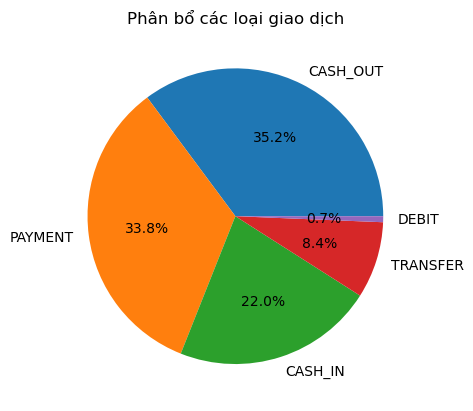

In [5]:
type = data.type.value_counts()
quantity = type.values
sum=type.values.sum()
figure = plt.pie((quantity/sum)*100, autopct = '%1.1f%%', labels=type.index)
plt.title("Phân bổ các loại giao dịch")
plt.show()

In [6]:
# kiểm tra mối tương quan
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [7]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "Không gian lận", 1: "Gian lận"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest         isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  Không gian lận               0  
1  M2044282225             0.0             0.0  Không gian lận               0  
2   C553264065             0.0             0.0        Gian lận               0  
3    C38997010         21182.0             0.0        Gian lận               0  
4  M1230701703             0.0             0.0  Không gian lận               0  


In [8]:

x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [9]:
# huấn luyện mô hình
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997013808776888


In [10]:
dt_accuracy = model.score(xtest, ytest)  # Lưu trữ độ chính xác
print(f"Độ chính xác của Decision Tree: {dt_accuracy:.4f}")

Độ chính xác của Decision Tree: 0.9997


In [11]:

#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 11633.76, 10127.0,   0.00  ]])
print("Dự đoán cho mẫu mới:",model.predict(features))

Dự đoán cho mẫu mới: ['Không gian lận']
